<a href="https://colab.research.google.com/github/MykhailoMykhailiuk/DS-HW/blob/main/Hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання 1

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

Двовимірний датасет

In [74]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/hw6/data_2d.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [75]:
df.columns = ['A', 'B', 'C']
df.head()

,A,B,C
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [76]:
df.dtypes

,0
A,float64
B,float64
C,float64


In [77]:
df.shape

(199, 3)

In [78]:
df.describe()

,A,B,C
count,199.000000,199.000000,199.000000
mean,0.502513,1.771587,2.220299
std,0.501255,1.230001,1.604383
min,0.000000,-1.488928,-1.344141
25%,0.000000,0.880885,0.979439
50%,1.000000,1.736607,2.283748
75%,1.000000,2.707277,3.608612
max,1.000000,4.554605,5.722027


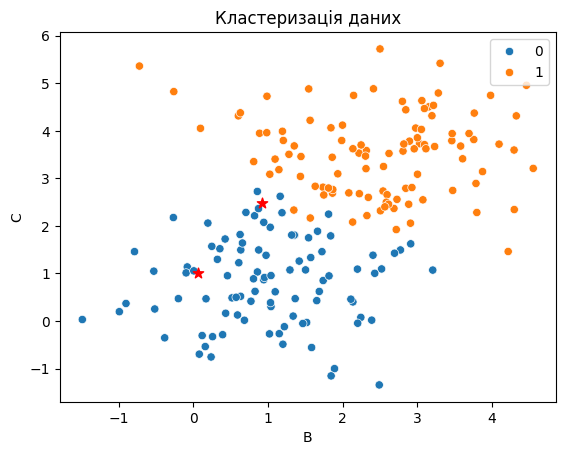

In [79]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=42)
km.fit(df)

centroid_x, centroid_y = km.cluster_centers_[:, 0], km.cluster_centers_[:, 1]

y_pred = km.predict(df)
sns.scatterplot(data=df, x='B', y='C', hue=y_pred)
plt.title('Кластеризація даних')
plt.scatter(centroid_x, centroid_y, marker="*", s=60, color="red")
plt.show()

In [80]:
elobow_range = range(1, 11)

def elbow(data, elobow_range=elobow_range):
  distortion = []
  for k in elobow_range:
      km = KMeans(n_clusters=k, random_state=42)
      km.fit(data)
      distortion.append(km.inertia_)
  return distortion

In [81]:
def silhouete(data, elobow_range=elobow_range):
  sil_score = []
  for k in elobow_range:
      km = KMeans(n_clusters=k, random_state=42)
      km.fit(data)
      if k>1:
        sil_score.append(silhouette_score(data, km.labels_))
  return sil_score

Elbow method

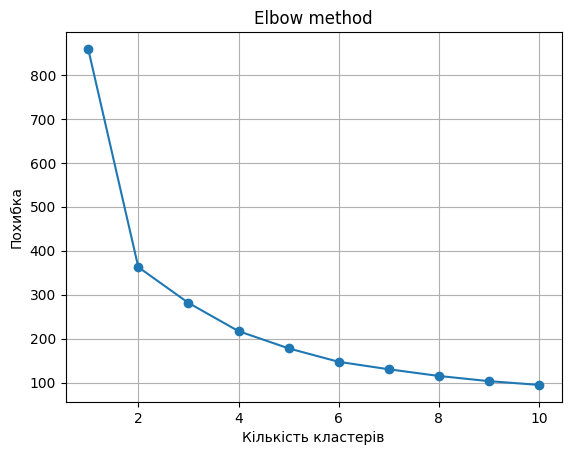

In [82]:
plt.plot(elobow_range, elbow(df), marker='o')
plt.grid()
plt.xlabel('Кількість кластерів')
plt.ylabel('Похибка')
plt.title('Elbow method')
plt.show()

Silhouette score method

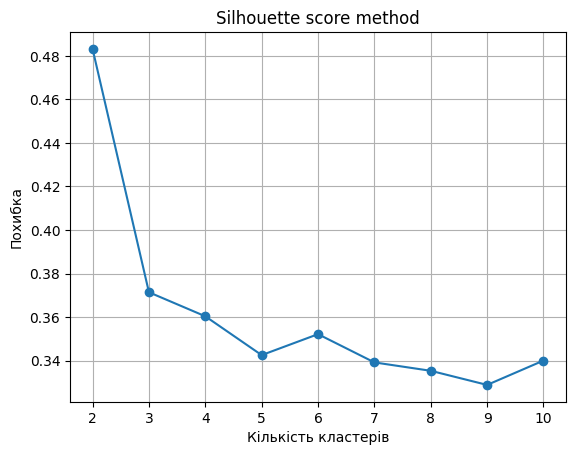

In [83]:
plt.plot(elobow_range[1:], silhouete(df), marker='o')
plt.grid()
plt.xlabel('Кількість кластерів')
plt.ylabel('Похибка')
plt.title('Silhouette score method')
plt.show()

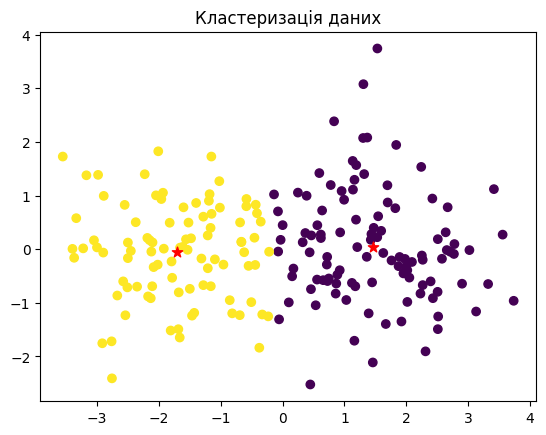

In [84]:
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(df)

km_2d = KMeans(n_clusters=2, random_state=42)
km_2d.fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km_2d.labels_)
plt.scatter(km_2d.cluster_centers_[:, 0], km_2d.cluster_centers_[:, 1], marker='*', s=60, color='red')
plt.title('Кластеризація даних')
plt.show()

Датасет mnist

In [85]:
file_path = '/content/drive/MyDrive/hw6/mnist.csv'
df = pd.read_csv(file_path)
df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


PCA для mnist датасету

In [91]:
X_mnist = df.iloc[: ,1:]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_mnist)


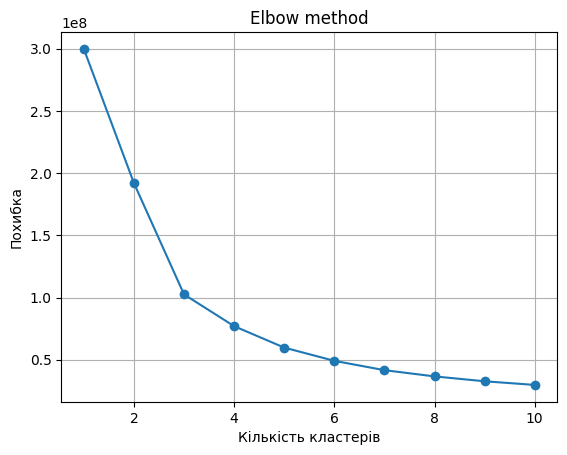

In [92]:
plt.plot(elobow_range, elbow(X_pca), marker='o')
plt.grid()
plt.xlabel('Кількість кластерів')
plt.ylabel('Похибка')
plt.title('Elbow method')
plt.show()

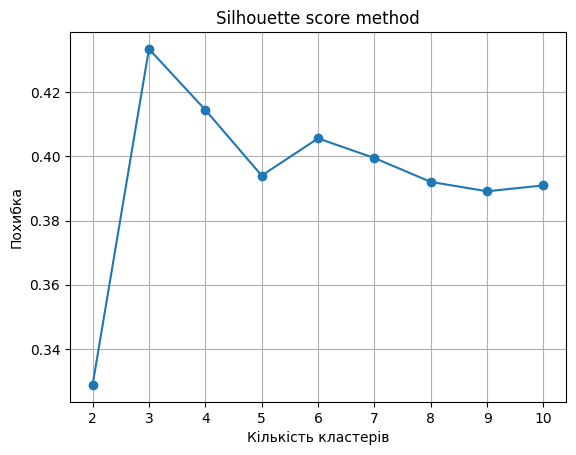

In [93]:
plt.plot(elobow_range[1:], silhouete(X_pca), marker='o')
plt.grid()
plt.xlabel('Кількість кластерів')
plt.ylabel('Похибка')
plt.title('Silhouette score method')
plt.show()

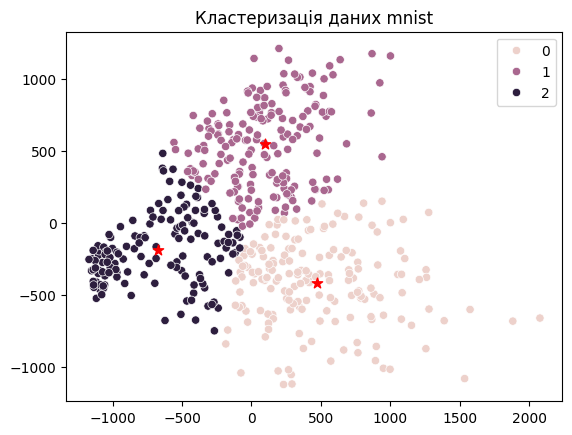

In [94]:
km_mnist = KMeans(n_clusters=3, random_state=42)
km_mnist.fit(X_pca)
y_pred = km_mnist.predict(X_pca)
centroid_x, centroid_y = km_mnist.cluster_centers_[:, 0], km_mnist.cluster_centers_[:, 1]
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred)
plt.scatter(centroid_x, centroid_y, marker="*", s=60, color="red")
plt.title('Кластеризація даних mnist')
plt.show()

**Висновок:**
1. Для двовимірного датасету за допомогою, як ліктевого так і силуетного методу визначення кількості кластерів, визначили, що датасет потрібно розділити на два кластери.
2. Для mnist датасету, після зменшення розмірності за допомогою PCA методу, кількість кластерів краще видно на графіку силуетного методу, 3 кластери.
